In [3]:
from tqdm import tqdm

In [4]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [6]:
joy = pd.read_csv('joy_list.csv')
joy.head(1)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url
0,32352195,You and I,네이비쿼카(NavyQuokka),You and I,[50],[너와 난 Never Ending Story 부를게 이 Melody 이 노랠 들...,https://image.bugsm.co.kr/album/images/200/204...


In [7]:
joy.drop_duplicates(['song_id','Lyric'], keep='first',inplace=True)

In [8]:
joy['Lyric']

0      [너와 난 Never Ending Story  부를게 이 Melody  이 노랠 들...
1      [유난스러운 하루에 끝이 올 때쯤  너의 모습들이  아른아른 대는 걸  무슨 일일까...
2      [나 그댈 위해 시 한 편을 쓰겠어  나 그대에게 못다 한 얘기 많아  차마 그때 ...
3      [조금 어색해도 살짝 웃어줘  지금 좋아  조금 귀찮아도 나를 믿어줘  하루 종일 ...
4      [사랑 나에겐 어려워  난 아직 서투른 걸 그래  너와 입 맞출 때도  모든 게 낯...
                             ...                        
278    [왜 이제야 왔니 어디에 있었던거니  조금은 늦은 듯 이제야 만났네    넌 사랑을...
279    [그렇게 대단한 운명까진  바란적 없다 생각했는데  그대 하나 떠나간 내 하룬 이제...
280    [눈을 뜨기 힘든 가을 보다 높은  저 하늘이 기분 좋아  휴일 아침이면 나를 깨운...
281    [언제부터 사랑이었는지 알아채는 요령없나요   그 어떤 맘이 변해서 사랑하게 되는지...
282    [두 눈에 비친 너의 미소  지친 날 감싸듯 내 맘 비춰  소리없이 찾아와 내 맘은...
Name: Lyric, Length: 283, dtype: object

In [9]:
j_lyric = joy['Lyric']
j_lyric[:5]

0    [너와 난 Never Ending Story  부를게 이 Melody  이 노랠 들...
1    [유난스러운 하루에 끝이 올 때쯤  너의 모습들이  아른아른 대는 걸  무슨 일일까...
2    [나 그댈 위해 시 한 편을 쓰겠어  나 그대에게 못다 한 얘기 많아  차마 그때 ...
3    [조금 어색해도 살짝 웃어줘  지금 좋아  조금 귀찮아도 나를 믿어줘  하루 종일 ...
4    [사랑 나에겐 어려워  난 아직 서투른 걸 그래  너와 입 맞출 때도  모든 게 낯...
Name: Lyric, dtype: object

In [10]:
# j_lyric = j_lyric.replace('\n',' ',regex=True).replace('_x000D_', ' ', regex= True)

In [11]:
# joy['Lyric']=j_lyric

In [12]:
from konlpy.tag import Okt  
okt = Okt() 

In [13]:
tagging_okt = []
for i in j_lyric:
    tag_word = okt.pos(i,stem=True)
    tagging_okt.append(tag_word)

In [14]:
tagging_okt[7]

[('[', 'Punctuation'),
 ('Please', 'Alpha'),
 ('내다', 'Verb'),
 ('사랑', 'Noun'),
 ('이', 'Josa'),
 ('찾아오다', 'Verb'),
 ('해', 'Noun'),
 ('수없이', 'Adverb'),
 ('너', 'Noun'),
 ('를', 'Josa'),
 ('생각', 'Noun'),
 ('하다', 'Verb'),
 ('늘', 'Noun'),
 ('그리다', 'Verb'),
 ('보다', 'Verb'),
 ('하다', 'Verb'),
 ('외롭다', 'Adjective'),
 ('밤', 'Noun'),
 ('은', 'Josa'),
 ('다', 'Adverb'),
 ('지나가다', 'Verb'),
 ('별', 'Noun'),
 ('을', 'Josa'),
 ('담다', 'Verb'),
 ('내다', 'Verb'),
 ('오다', 'Verb'),
 ('어서', 'Noun'),
 ('오다', 'Verb'),
 ('내', 'Noun'),
 ('맘', 'Noun'),
 ('받다', 'Verb'),
 ('이미', 'Adverb'),
 ('준비', 'Noun'),
 ('하고', 'Josa'),
 ('있다', 'Adjective'),
 ('아무', 'Noun'),
 ('생각', 'Noun'),
 ('말고', 'Josa'),
 ('다가', 'Noun'),
 ('와도', 'Josa'),
 ('돼다', 'Verb'),
 ('어서', 'Noun'),
 ('오다', 'Verb'),
 ('내', 'Noun'),
 ('맘', 'Noun'),
 ('받다', 'Verb'),
 ('이미', 'Adverb'),
 ('준비', 'Noun'),
 ('하고', 'Josa'),
 ('있다', 'Adjective'),
 ('아무', 'Noun'),
 ('생각', 'Noun'),
 ('말고', 'Josa'),
 ('들어오다', 'Verb'),
 ('돼다', 'Verb'),
 ('You', 'Alpha'),
 ('생각', 'Noun'),


가사의 최대 길이 : 728
가사의 평균 길이 : 225.23321554770317


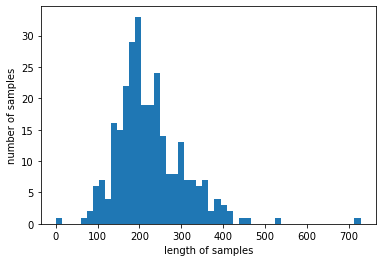

In [15]:
# 가사 길이 분포 확인
print('가사의 최대 길이 :',max(len(l) for l in tagging_okt))
print('가사의 평균 길이 :',sum(map(len, tagging_okt))/len(tagging_okt))
plt.hist([len(s) for s in tagging_okt], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [17]:
len(corpus)

39053

In [18]:
corpus[-10:]

['나나', '나나', '꽃잎', '날리다', '햇살', '비치', '그대', '시간', '기다리다', '오다']

---

In [ ]:
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
class callback(CallbackAny2Vec): 
    """Callback to print loss after each epoch.""" 
    def __init__(self): 
        self.epoch = 0 
        self.loss_to_be_subed = 0 

    def on_epoch_end(self, model): 
        loss = model.get_latest_training_loss() 
        loss_now = loss - self.loss_to_be_subed 
        self.loss_to_be_subed = loss 
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now)) 
        self.epoch += 1


In [ ]:
model = Word2Vec(corpus, size=100, workers=4, sg=1, compute_loss=True, iter=5, callbacks=[callback()])
model.wv.save_word2vec_format(model_fname)

---

## 단어 임베딩
*  LSA, Word2Vec, GloVe, FastText 등
> http://doc.mindscale.kr/km/unstructured/11.html

---

## word2vec
* workers=4 , (CPU 쓰레드 수: 4)
* vector_size = 150, (임베딩 차원수)
* sg = 1, (Skip-gram) # 0: CBOW, 1: Skip-gram
* callbacks = epoch당 loss를 확인

* Skip-gram : 중심 단어를 통해 주변단어를 예측하는 모델
* CBOW :  주변 단어들을 통해서 중간의 단어를 예측하는 모델

In [ ]:
model = Word2Vec(data,         # 리스트 형태의 데이터
                 sg = 1,         # 0: CBOW, 1: Skip-gram
                 vector_size=100,     # 벡터 크기
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

### 저장 & 불러오기
* `.save()`를 통해 word2vec 모델을 저장할 수 있다.<br>
model.save('word2vec.model')

* 저장한 모델을 불러 올 때는 `.load()`를 사용한다.<br>
model = Word2Vec.load('word2vec.model')

---

In [20]:
joy.head(1)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url
0,32352195,You and I,네이비쿼카(NavyQuokka),You and I,[50],[너와 난 Never Ending Story 부를게 이 Melody 이 노랠 들...,https://image.bugsm.co.kr/album/images/200/204...


In [112]:
# 불용어 단어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게',
          'so','am','baby','and','can','you','much','me','for','go','in',
          '은', '는', '이', '가', '하','하자','토록',
          'know','no','of','let','my','수','너','내','나','그','난','봐','돼','건','모든',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기','우리','그대','다시',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면','같아','있어','지금',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜','거야',']','[']

## model1
* okt _ stem = True
* stopword

In [22]:
# 형태소 분석 사용
okt = Okt()

tokenized_data = []
for sentence in tqdm(joy['Lyric']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stop_w] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|████████████████████████████████████████████████████████████████████████████████| 283/283 [00:03<00:00, 71.93it/s]


In [23]:
# from gensim.models import Word2Vec
# model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [24]:
from gensim.models.word2vec import Word2Vec as wv
##태깅한 데이터들을 담은 변수 
model = wv(tokenized_data, min_count =1 ,vector_size =370, epochs = 10,
sg=1, batch_words=1000, window = 5)

In [25]:
print(model.wv.vectors.shape)

(4060, 370)


총 4060개의 단어가 존재하며 각 단어는 370차원으로 구성

In [26]:
print(model.wv.most_similar("행복"))

[('험하다', 0.9430268406867981), ('길이', 0.9358264207839966), ('멀다', 0.9117670059204102), ('놓치다', 0.898459255695343), ('안녕', 0.8945025205612183), ('참고', 0.8924992084503174), ('찾다', 0.8911870718002319), ('영원', 0.8869401216506958), ('돌아오다', 0.8850411176681519), ('훗날', 0.8806968331336975)]


In [27]:
print(model.wv.most_similar("사랑", topn=5))

[('부족하다', 0.9069110155105591), ('태어나다', 0.9062994718551636), ('에겐', 0.9019846320152283), ('믿다', 0.8962773680686951), ('그것', 0.8954706192016602)]


In [28]:
print(model.wv.most_similar("이별", topn=5))

[('살아가다', 0.9823235273361206), ('이면', 0.9803281426429749), ('슬픔', 0.9772821664810181), ('동안', 0.977069079875946), ('기쁨', 0.9762882590293884)]


## model2
* strip() split(" ")

In [29]:
corpus2 = [sent.strip().split(" ") for sent in tqdm(j_lyric)]

100%|█████████████████████████████████████████████████████████████████████████████| 283/283 [00:00<00:00, 56550.17it/s]


In [30]:
from gensim.models.word2vec import Word2Vec as wv
##태깅한 데이터들을 담은 변수 
model2 = wv(corpus2, min_count =1 ,vector_size =370, epochs = 10,
sg=1, batch_words=1000, window = 5)

In [31]:
print(model2.wv.vectors.shape)

(10268, 370)


In [32]:
print(model2.wv.most_similar("행복"))

[('그땐', 0.9967271089553833), ('괜찮아요', 0.996300220489502), ('있겠어요', 0.9957355856895447), ('좋을', 0.9956374168395996), ('비춰줄게', 0.9954794049263), ('좋은데)', 0.9954351782798767), ('지금보다', 0.9952442049980164), ('이토록', 0.9952433705329895), ('나였음을', 0.9951215982437134), ('안아볼', 0.9951117038726807)]


In [33]:
print(model2.wv.most_similar("사랑", topn=5))

[('당신을', 0.9680556654930115), ('하나뿐인', 0.9664064049720764), ('마음은', 0.9538599848747253), ('빛', 0.9537689685821533), ('마음', 0.9510836005210876)]


## model3
* strip()_ split()
* stopword

In [34]:
corpus3 = []
for sentence in tqdm(joy['Lyric']):
    tokenized_sentence = sentence.strip().split(" ")
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stop_w] # 불용어 제거
    corpus3.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████████████| 283/283 [00:00<00:00, 2282.25it/s]


In [35]:
from gensim.models.word2vec import Word2Vec as wv
##태깅한 데이터들을 담은 변수 
model3 = wv(corpus3, min_count =1 ,vector_size =370, epochs = 10,
sg=1, batch_words=1000, window = 5)

In [36]:
print(model3.wv.most_similar("사랑"))

[('사랑합니다', 0.9845211505889893), ('그대를', 0.9727385640144348), ('당신을', 0.968734860420227), ('하지만', 0.9636387228965759), ('하나뿐인', 0.9634321331977844), ('사랑해요', 0.9606936573982239), ('그대여', 0.9576258659362793), ('마음을', 0.9522129893302917), ('사랑할', 0.9510269165039062), ('못하지만', 0.9482035040855408)]


In [37]:
print(model3.wv.most_similar("행복"))

[('멀게만', 0.9990216493606567), ('보낸', 0.9988969564437866), ('있음에', 0.9988470673561096), ('믿을', 0.9987689852714539), ('열어주는', 0.9987685084342957), ('한번도', 0.9987473487854004), ('미소를', 0.9986916780471802), ('내줘요', 0.9986755847930908), ('위로라도', 0.9986660480499268), ('누굴', 0.9986622929573059)]


In [38]:
print(model3.wv.most_similar("따뜻한"))

[('있죠', 0.9967788457870483), ('사랑할게요', 0.995135486125946), ('제일', 0.9950152039527893), ('안녕', 0.994528591632843), ('지나고', 0.9941496253013611), ('있어요', 0.9940662384033203), ('사랑하고', 0.9937880635261536), ('그대만을', 0.9933575987815857), ('마음으로', 0.9932870864868164), ('영원토록', 0.9932177662849426)]


In [39]:
print(model3.wv.most_similar("이별"))

[('와서', 0.9990229606628418), ('아니라', 0.9987657070159912), ('흘려', 0.9986855983734131), ('조용하게', 0.9986829161643982), ('괜시리', 0.9986628293991089), ('넘어져도', 0.9985862374305725), ('축하해', 0.9985852241516113), ('세상위에', 0.9984535574913025), ('말이라', 0.998443067073822), ('행복했어', 0.9984200596809387)]


In [45]:
print(model3.wv.most_similar(positive=['사랑', '행복'], negative=['이별'], topn=1))

[('사랑합니다', 0.9765802025794983)]


---

In [41]:
lyric_emotion = ['사랑', '행복']
emotion_list = [] # n개의 감정 단어가 담길 리스트
for index in range(len(lyric_emotion)):
    emotion_one = [] #1개의 감정 단어가 담길 리스트
    for word in model.wv.most_similar(lyric_emotion[index]):
        if(word[1] >= 0.9): # 튜플형식, 1번째 인덱스의 유사도와 비교
            emotion_one.append(word)
    emotion_list.append(emotion_one)

In [42]:
emotion_list

[[('부족하다', 0.9069110155105591),
  ('태어나다', 0.9062994718551636),
  ('에겐', 0.9019846320152283)],
 [('험하다', 0.9430268406867981),
  ('길이', 0.9358264207839966),
  ('멀다', 0.9117670059204102)]]

In [44]:
print(model.wv.most_similar(positive=['사랑', '행복'], negative=['이별'], topn=1))

[('태어나다', 0.8212791681289673)]


In [46]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [47]:
from pandas import Series, DataFrame
corpus_data = Series(corpus)
print(corpus_data)

0           너
1           난
2         부르다
3           이
4           이
         ... 
39048      비치
39049      그대
39050      시간
39051    기다리다
39052      오다
Length: 39053, dtype: object


In [48]:
seri_data = Series(word_dict)
print(seri_data)
print(seri_data.value_counts()[:5])

너       1170
난        445
부르다       25
이        280
노랗다       20
        ... 
마음씨        1
하나요        2
오래오래       2
상관         1
보살피다       1
Length: 2768, dtype: int64
1    962
2    404
3    246
4    188
5    124
dtype: int64


In [49]:
df = DataFrame(seri_data, columns=['count'])

In [50]:
df.sort_values(by='count',ascending=False).head(5)

,count
하다,1667
너,1170
내,953
사랑,814
나,712


In [81]:
df_top = df.sort_values(by='count',ascending=False).head(20)

In [88]:
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [87]:
import matplotlib.font_manager as fm

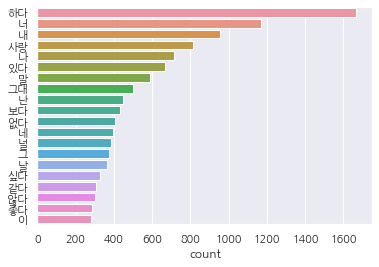

In [89]:
sns.barplot(df_top['count'],df_top.index)

sns.set(rc={'figure.figsize':(20,20)}, font='NanumBarunGothic.ttf')

---

### Scikit-Learn 문서 전처리 기능
* TfidfVectorizer:<br>
CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.
> https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
tfidf = TfidfVectorizer(stop_words=stop_w,
                        lowercase=True,
                        max_features=1000)

In [145]:
joy['Lyric'] = joy['Lyric'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
joy[:5]

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url
0,32352195,You and I,네이비쿼카(NavyQuokka),You and I,[50],너와 난 부를게 이 이 노랠 들어줘 손 놓지 말아 줘 들려줘...,https://image.bugsm.co.kr/album/images/200/204...
1,32330796,그렇게 됐나 봐 (아는 여자애 X 이민혁),이민혁,그렇게 됐나 봐 (아는 여자애 X 이민혁),[168],유난스러운 하루에 끝이 올 때쯤 너의 모습들이 아른아른 대는 걸 무슨 일일까 ...,https://image.bugsm.co.kr/album/images/200/204...
2,6133190,나 그댈위해 시 한편을 쓰겠어,케이시,옛이야기,[916],나 그댈 위해 시 한 편을 쓰겠어 나 그대에게 못다 한 얘기 많아 차마 그때 하...,https://image.bugsm.co.kr/album/images/200/406...
3,6133520,셔터 (Shutter),소란(SORAN),셔터 (Shutter),[113],조금 어색해도 살짝 웃어줘 지금 좋아 조금 귀찮아도 나를 믿어줘 하루 종일 ...,https://image.bugsm.co.kr/album/images/200/406...
4,32360930,Our Blue (아는 여자애 X CHEEZE (치즈)),CHEEZE(치즈),Our Blue (아는 여자애 X CHEEZE (치즈)),[105],사랑 나에겐 어려워 난 아직 서투른 걸 그래 너와 입 맞출 때도 모든 게 낯설...,https://image.bugsm.co.kr/album/images/200/204...


In [148]:
joy['Lyric'] = joy['Lyric'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
joy['Lyric'].replace('', np.nan, inplace=True)
print(joy.isnull().sum())

song_id       0
song_name     0
artist        0
album         0
Like_Count    0
Lyric         4
cover_url     0
dtype: int64


In [152]:
joy = joy.dropna(how = 'any')
print('전처리 후 데이터의 개수 :',len(joy))

전처리 후 데이터의 개수 : 279


In [153]:
joy['Lyric'] = j_lyric

In [154]:
j_lyric

0      너와 난     부를게 이   이 노랠 들어줘 손 놓지 말아 줘        들려줘...
1      유난스러운 하루에 끝이 올 때쯤  너의 모습들이  아른아른 대는 걸  무슨 일일까 ...
2      나 그댈 위해 시 한 편을 쓰겠어  나 그대에게 못다 한 얘기 많아  차마 그때 하...
3      조금 어색해도 살짝 웃어줘  지금 좋아  조금 귀찮아도 나를 믿어줘  하루 종일  ...
4      사랑 나에겐 어려워  난 아직 서투른 걸 그래  너와 입 맞출 때도  모든 게 낯설...
                             ...                        
278    왜 이제야 왔니 어디에 있었던거니  조금은 늦은 듯 이제야 만났네    넌 사랑을 ...
279    그렇게 대단한 운명까진  바란적 없다 생각했는데  그대 하나 떠나간 내 하룬 이제 ...
280    눈을 뜨기 힘든 가을 보다 높은  저 하늘이 기분 좋아  휴일 아침이면 나를 깨운 ...
281    언제부터 사랑이었는지 알아채는 요령없나요   그 어떤 맘이 변해서 사랑하게 되는지 ...
282    두 눈에 비친 너의 미소  지친 날 감싸듯 내 맘 비춰  소리없이 찾아와 내 맘은 ...
Name: Lyric, Length: 283, dtype: object

In [159]:
joy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 282
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     279 non-null    int64 
 1   song_name   279 non-null    object
 2   artist      279 non-null    object
 3   album       279 non-null    object
 4   Like_Count  279 non-null    object
 5   Lyric       279 non-null    object
 6   cover_url   279 non-null    object
dtypes: int64(1), object(6)
memory usage: 17.4+ KB


In [160]:
tdm = tfidf.fit_transform(j_lyric.values.astype('U'))  ## Even astype(str) would work

In [161]:
words = tfidf.get_feature_names()
words[-5:]

['하지만', '함께', '항상', '해도', '행복해져라']

In [164]:
tdm.indices

array([ 2, 98, 51, ..., 55,  0, 70], dtype=int32)

In [165]:
for i, n in sorted(zip(tdm[0].indices, tdm[0].data)):
    print(words[i], n)

곁에 0.12582244732100434
너와 0.6153819251994416
세상이 0.17850870696858234
영원히 0.7432370731093305
해도 0.14562655176945755


In [166]:
count = tdm.sum(axis=0)

In [167]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': count.flat})

In [169]:
word_count.head()

,단어,빈도
0,같은,8.469595
1,같이,5.592906
2,곁에,9.917062
3,계속,4.857956
4,괜찮아,6.174844


In [168]:
word_count.tail()

,단어,빈도
95,하지만,5.620482
96,함께,14.827542
97,항상,6.848749
98,해도,6.491859
99,행복해져라,0.999401


In [171]:
sorted_df = word_count.sort_values('빈도', ascending=False)  # 내림차순 정렬
sorted_df.head(10)

,단어,빈도
48,사랑해,15.380508
96,함께,14.827542
56,싶어,14.200427
68,없어,12.507358
87,좋아,11.478479
21,너와,11.337454
44,사랑을,10.954312
24,눈을,10.895720
6,그냥,10.881950
20,너에게,10.807891


In [185]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = word_count.set_index('단어')['빈도'].to_dict()
count_dic

{'같은': 8.469594985778492,
 '같이': 5.59290571917435,
 '곁에': 9.917061772054053,
 '계속': 4.85795567190118,
 '괜찮아': 6.174843992926508,
 '그게': 7.435518205880385,
 '그냥': 10.881950487998367,
 '그대가': 6.032574216610663,
 '그대는': 4.528082664914761,
 '그대를': 6.452858274255498,
 '그대와': 5.930690828233193,
 '그댈': 10.690333677125466,
 '그래': 6.073946959969722,
 '그저': 6.24420101158311,
 '기분': 4.950151234544936,
 '나도': 7.641323277885948,
 '나와': 5.183843972843977,
 '내겐': 5.85843328077587,
 '너도': 6.173449393737242,
 '너만': 5.9129952567588475,
 '너에게': 10.807891076219457,
 '너와': 11.337454159214222,
 '네게': 7.6384560889316395,
 '누구보다': 3.120949149884321,
 '눈을': 10.89571951758618,
 '다른': 9.746998985517552,
 '때면': 5.949775414686179,
 '마음': 10.19056125309067,
 '만들어': 4.27519574142401,
 '많은': 6.125453721725418,
 '많이': 5.540932012435533,
 '말도': 6.3877637543250065,
 '말을': 5.762330981869333,
 '말이': 5.885136249871932,
 '말하고': 5.262008659057178,
 '맘을': 7.376321983172156,
 '매일': 7.8793539685302445,
 '모두': 6.69243249397958,


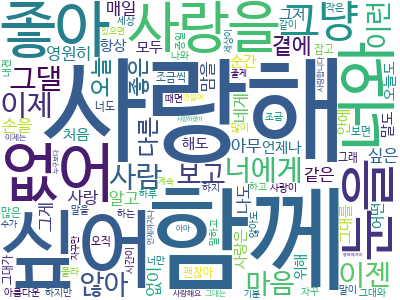

In [187]:
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

---

## 가사 기반 코사인 유사도 적용

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 100, stop_words=stop_w)
tfidf_matrix = tfidf.fit_transform(joy['Lyric'])
print(tfidf_matrix.shape) 

(279, 100)


In [173]:
from sklearn.metrics.pairwise import linear_kernel
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [174]:
row_number = pd.Series(joy.index, index = joy['song_name']).drop_duplicates()
row_number.head(10)

song_name
You and I                          0
그렇게 됐나 봐 (아는 여자애 X 이민혁)            1
나 그댈위해 시 한편을 쓰겠어                   2
셔터 (Shutter)                       3
Our Blue (아는 여자애 X CHEEZE (치즈))    4
Hold Me Back                       5
둘이                                 6
Welcome (feat. Daowl)              7
널 좋아, 좋아해                          8
우리의 이야기                            9
dtype: int64

In [189]:
joy.song_name.unique()[:10]

array(['You and I', '그렇게 됐나 봐 (아는 여자애 X 이민혁)', '나 그댈위해 시 한편을 쓰겠어',
       '셔터 (Shutter)', 'Our Blue (아는 여자애 X CHEEZE (치즈))', 'Hold Me Back',
       '둘이', 'Welcome (feat. Daowl)', '널 좋아, 좋아해', '우리의 이야기'],
      dtype=object)

In [180]:
def rec_title(title, cos_sim=cos_sim):
    # 제목에 부여된 번호 저장
    idx = row_number[title]

    # 모든 노래와 해당 노래의 유사도를 저장
    score = list(enumerate(cos_sim[idx]))

    # 유사도에 따라 노래들을 정렬
    score = sorted(score, key=lambda x: x[1], reverse=True)

    # 내용상 가장 유사한 5개의 노래를 받아온다.
    title_list = score[0:5]

    # 해당 노래들의 인덱스를 저장
    music_idx = [n[0] for n in title_list]

    # 인덱싱을 이용해 노래 제목을 반환
    return joy['song_name'].iloc[music_idx]

In [181]:
rec_title('비밀번호 486')

142    내사랑 투유 (duet with 홍서범)
65              Waiting For U
149                 내 남자 친구에게
269                        축복
123                  Hug (포옹)
Name: song_name, dtype: object

In [183]:
rec_title('가을편지')

110     P.S. I Love You
157                그대라면
85             사랑하기 때문에
81     감사 (Bonus Track)
154                  고백
Name: song_name, dtype: object

In [184]:
rec_title('좋은 날')

133    금요일에 만나요 (feat. 장이정 Of History)
53                                 토요일
1              그렇게 됐나 봐 (아는 여자애 X 이민혁)
9                              우리의 이야기
251                            사랑한다는 말
Name: song_name, dtype: object